<a href="https://colab.research.google.com/github/SoumiPi/menaces_cybersecuritaires/blob/main/menaces_cybersecuritaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Téléchargement du fichier
!wget https://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz

# Décompression du fichier
!tar -xzf url_svmlight.tar.gz

# Vérification des fichiers extraits
!ls url_svmlight/

--2024-11-26 18:53:40--  https://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz
Resolving www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)... 137.110.222.10
Connecting to www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)|137.110.222.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245011835 (234M) [application/x-gzip]
Saving to: ‘url_svmlight.tar.gz’

url_svmlight.tar.gz 100%[===================>] 233.66M  53.1MB/s    in 4.8s    

2024-11-26 18:53:45 (48.4 MB/s) - ‘url_svmlight.tar.gz’ saved [245011835/245011835]

Day0.svm    Day114.svm	Day1.svm   Day34.svm  Day49.svm  Day63.svm  Day78.svm  Day92.svm
Day100.svm  Day115.svm	Day20.svm  Day35.svm  Day4.svm	 Day64.svm  Day79.svm  Day93.svm
Day101.svm  Day116.svm	Day21.svm  Day36.svm  Day50.svm  Day65.svm  Day7.svm   Day94.svm
Day102.svm  Day117.svm	Day22.svm  Day37.svm  Day51.svm  Day66.svm  Day80.svm  Day95.svm
Day103.svm  Day118.svm	Day23.svm  Day38.svm  Day52.svm  Day67.svm  Day81.svm  Day96.svm
Day104.svm  Day119.svm

In [5]:
# Import des bibliothèques nécessaires
import numpy as np
from scipy.sparse import csr_matrix
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix



def load_svmlight_file(filepath):
    """
    Charge un fichier au format SVM-light et retourne les étiquettes et les features
    """
    labels = []
    row_ind = []
    col_ind = []
    values = []
    max_feat_ind = 0
    row = 0

    with open(filepath, 'r') as f:
        for line in f:
            # Ignore les lignes vides ou commentaires
            if line.strip() == '' or line.startswith('#'):
                continue

            elements = line.strip().split()
            # Premier élément est l'étiquette
            labels.append(float(elements[0]))

            # Traitement des features
            for e in elements[1:]:
                feat_ind, feat_val = e.split(':')
                feat_ind = int(feat_ind)
                feat_val = float(feat_val)

                row_ind.append(row)
                col_ind.append(feat_ind)
                values.append(feat_val)
                max_feat_ind = max(max_feat_ind, feat_ind)

            row += 1

    # Conversion en arrays numpy
    labels = np.array(labels)

    # Création de la matrice sparse
    features = csr_matrix((values, (row_ind, col_ind)),
                         shape=(row, max_feat_ind + 1))

    return labels, features, max_feat_ind + 1

# Maintenant on peut charger les données
labels, features, n_features = load_svmlight_file('url_svmlight/Day0.svm')

# Affichage de quelques informations de base
print(f"Nombre d'échantillons : {len(labels)}")
print(f"Nombre de features : {n_features}")
print(f"Nombre d'URLs malveillantes : {sum(labels == 1)}")
print(f"Nombre d'URLs bénignes : {sum(labels == -1)}")

# Pour voir la forme de la matrice des features
print(f"\nForme de la matrice des features : {features.shape}")

Nombre d'échantillons : 16000
Nombre de features : 3231950
Nombre d'URLs malveillantes : 5963
Nombre d'URLs bénignes : 10037

Forme de la matrice des features : (16000, 3231950)


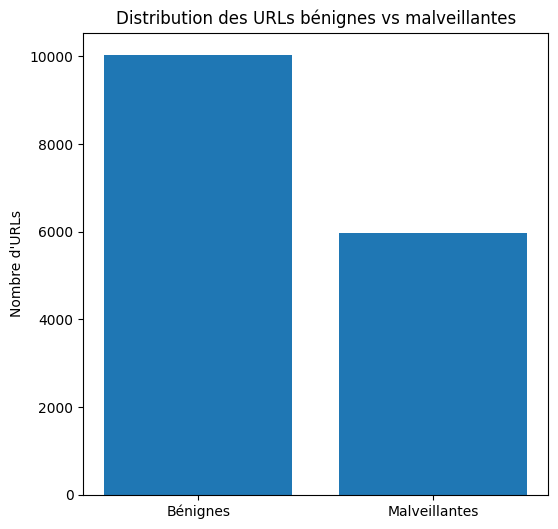


Densité de la matrice : 0.000036
Nombre moyen de features non-nulles par URL : 115.47


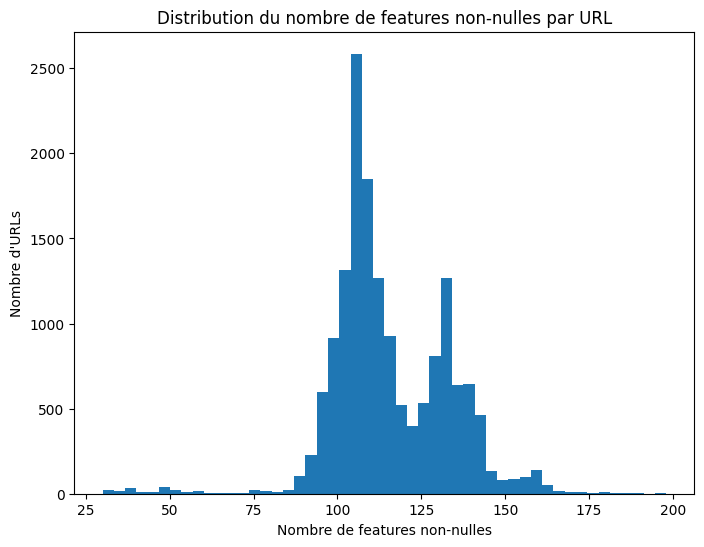

In [16]:


# Visualisation de la distribution des classes
plt.figure(figsize=(6, 6))
plt.bar(['Bénignes', 'Malveillantes'], [sum(labels == -1), sum(labels == 1)])
plt.title('Distribution des URLs bénignes vs malveillantes')
plt.ylabel('Nombre d\'URLs')
plt.show()

# Analyse de la densité des features
density = features.nnz / (features.shape[0] * features.shape[1])
print(f"\nDensité de la matrice : {density:.6f}")
print(f"Nombre moyen de features non-nulles par URL : {features.nnz / features.shape[0]:.2f}")

# Distribution du nombre de features par URL
features_per_url = np.diff(features.indptr)
plt.figure(figsize=(8, 6))
plt.hist(features_per_url, bins=50)
plt.title('Distribution du nombre de features non-nulles par URL')
plt.xlabel('Nombre de features non-nulles')
plt.ylabel('Nombre d\'URLs')
plt.show()

Analyse des valeurs manquantes dans Day0.svm :
--------------------------------------------------

Nombre de lignes vides : 0

Nombre de features toujours à zéro : 3157837
Nombre de features non utilisées : 3157837

Statistiques sur les features par ligne :
Moyenne de features non-nulles par ligne : 115.47
Médiane de features non-nulles par ligne : 111.00
Min de features non-nulles par ligne : 30
Max de features non-nulles par ligne : 198


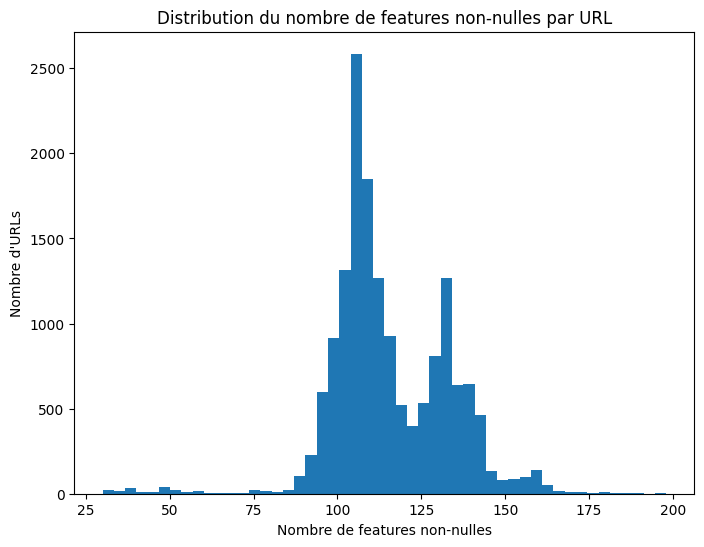


Densité globale de la matrice : 0.000036

Top 20 features les plus fréquemment non-nulles :
Feature 155153: présente dans 16000 URLs
Feature 155154: présente dans 16000 URLs
Feature 155155: présente dans 16000 URLs
Feature 4: présente dans 16000 URLs
Feature 5: présente dans 16000 URLs
Feature 6: présente dans 16000 URLs
Feature 155156: présente dans 15935 URLs
Feature 155176: présente dans 15924 URLs
Feature 155174: présente dans 15924 URLs
Feature 155183: présente dans 15924 URLs
Feature 64: présente dans 15924 URLs
Feature 155181: présente dans 15924 URLs
Feature 155180: présente dans 15924 URLs
Feature 155177: présente dans 15924 URLs
Feature 155182: présente dans 15924 URLs
Feature 155179: présente dans 15924 URLs
Feature 155178: présente dans 15924 URLs
Feature 155175: présente dans 15924 URLs
Feature 155164: présente dans 15861 URLs
Feature 155163: présente dans 15861 URLs


In [17]:

# 1. Vérification des lignes vides
def check_empty_rows(sparse_matrix):
    """Vérifie s'il y a des lignes sans aucune feature"""
    row_sums = sparse_matrix.getnnz(axis=1)
    empty_rows = np.where(row_sums == 0)[0]
    return empty_rows

# 2. Vérification des features toujours à zéro
def check_empty_features(sparse_matrix):
    """Vérifie s'il y a des features toujours à zéro"""
    col_sums = sparse_matrix.getnnz(axis=0)
    empty_features = np.where(col_sums == 0)[0]
    return empty_features

# Application sur nos données
print("Analyse des valeurs manquantes dans Day0.svm :")
print("-" * 50)

# Recherche des lignes vides
empty_rows = check_empty_rows(features)
print(f"\nNombre de lignes vides : {len(empty_rows)}")
if len(empty_rows) > 0:
    print("Indices des lignes vides :", empty_rows)

# Recherche des features toujours à zéro
empty_features = check_empty_features(features)
print(f"\nNombre de features toujours à zéro : {len(empty_features)}")
if len(empty_features) > 0:
    print("Nombre de features non utilisées :", len(empty_features))

# Statistiques sur la densité des features
print("\nStatistiques sur les features par ligne :")
features_per_row = features.getnnz(axis=1)
print(f"Moyenne de features non-nulles par ligne : {np.mean(features_per_row):.2f}")
print(f"Médiane de features non-nulles par ligne : {np.median(features_per_row):.2f}")
print(f"Min de features non-nulles par ligne : {np.min(features_per_row)}")
print(f"Max de features non-nulles par ligne : {np.max(features_per_row)}")

# Visualisation de la distribution des features non-nulles
plt.figure(figsize=(8, 6))
plt.hist(features_per_row, bins=50)
plt.title('Distribution du nombre de features non-nulles par URL')
plt.xlabel('Nombre de features non-nulles')
plt.ylabel('Nombre d\'URLs')
plt.show()

# Densité globale de la matrice
density = features.nnz / (features.shape[0] * features.shape[1])
print(f"\nDensité globale de la matrice : {density:.6f}")

# Top features les plus présentes
feature_presence = features.getnnz(axis=0)
top_features_idx = np.argsort(-feature_presence)[:20]
print("\nTop 20 features les plus fréquemment non-nulles :")
for idx in top_features_idx:
    print(f"Feature {idx}: présente dans {feature_presence[idx]} URLs")

il n'y a pas de ligne vides, donc les donc  toules urls ont au moins features
La distribution est rélativement équilibrée. On aussi 3157837 features toujours à zéro pour tous les urls, ce qui veut dire que 3157837 de features ne sont pas utilisés, ou ne seront pas utiles pour pour déterminer si un url est maveillant ou pas.

On constate aussi le numéro des features les plus fréquents dans toutes les URLS: 155153, 155154, 155155, 4, 5, 6. il ya d'autres aussi.


Un autre élément est que nous avons 198 de features maximal et 30 min pour les urls. Ce qui veut dire qu'il a des urls avec de colonnes avec les valeurs nulles.

198 : C'est le nombre MAXIMUM de features non-nulles qu'une URL individuelle peut avoir

30 : C'est le nombre MINIMUM de features non-nulles qu'une URL individuelle peut avoir

In [18]:
# Imports nécessaires

def load_svmlight_file(filepath):
    """
    Charge un fichier au format SVM-light et retourne les étiquettes et les features
    """
    labels = []
    row_ind = []
    col_ind = []
    values = []
    max_feat_ind = 0
    row = 0

    with open(filepath, 'r') as f:
        for line in f:
            # Ignore les lignes vides ou commentaires
            if line.strip() == '' or line.startswith('#'):
                continue

            elements = line.strip().split()
            # Premier élément est l'étiquette
            labels.append(float(elements[0]))

            # Traitement des features
            for e in elements[1:]:
                feat_ind, feat_val = e.split(':')
                feat_ind = int(feat_ind)
                feat_val = float(feat_val)

                row_ind.append(row)
                col_ind.append(feat_ind)
                values.append(feat_val)
                max_feat_ind = max(max_feat_ind, feat_ind)

            row += 1

    # Conversion en arrays numpy
    labels = np.array(labels)

    # Création de la matrice sparse
    features = csr_matrix((values, (row_ind, col_ind)),
                         shape=(row, max_feat_ind + 1))

    return labels, features, max_feat_ind + 1

# Chargement des données
labels, features, n_features = load_svmlight_file('url_svmlight/Day0.svm')

# Maintenant nous pouvons analyser les colonnes
col_counts = features.getnnz(axis=0)

# Identifier les colonnes avec différents niveaux de présence
print("\nAnalyse de la présence des features :")
print(f"Features présentes dans toutes les URLs : {sum(col_counts == features.shape[0])}")
print(f"Features présentes dans plus de 75% des URLs : {sum(col_counts > 0.75 * features.shape[0])}")
print(f"Features présentes dans plus de 50% des URLs : {sum(col_counts > 0.5 * features.shape[0])}")
print(f"Features présentes dans plus de 25% des URLs : {sum(col_counts > 0.25 * features.shape[0])}")
print(f"Features présentes dans au moins une URL : {sum(col_counts > 0)}")

# Distribution détaillée des présences
print("\nDistribution détaillée :")
print(f"Features jamais utilisées : {sum(col_counts == 0)}")
ranges = [(0,10), (10,100), (100,1000), (1000,10000), (10000, features.shape[0])]
for start, end in ranges:
    count = sum((col_counts > start) & (col_counts <= end))
    print(f"Features présentes dans {start}-{end} URLs : {count}")


Analyse de la présence des features :
Features présentes dans toutes les URLs : 6
Features présentes dans plus de 75% des URLs : 68
Features présentes dans plus de 50% des URLs : 86
Features présentes dans plus de 25% des URLs : 97
Features présentes dans au moins une URL : 74113

Distribution détaillée :
Features jamais utilisées : 3157837
Features présentes dans 0-10 URLs : 70123
Features présentes dans 10-100 URLs : 3211
Features présentes dans 100-1000 URLs : 599
Features présentes dans 1000-10000 URLs : 100
Features présentes dans 10000-16000 URLs : 80


Nous allons supprimer tous les features qui ne sont jamais utilisés, c'est à dire les features qui ont une valeur 0 pour tous les urls.

In [4]:
# 1. Identifier les colonnes avec au moins une valeur non-nulle
col_counts = features.getnnz(axis=0)
active_cols = np.where(col_counts > 0)[0]

# 2. Créer une nouvelle matrice avec uniquement les features actives
features_cleaned = features[:, active_cols]

# 3. Vérifier les dimensions avant/après
print("Dimensions originales:", features.shape)
print("Dimensions après nettoyage:", features_cleaned.shape)

# 4. Vérifier les propriétés de la nouvelle matrice
print("\nPropriétés de la nouvelle matrice:")
print(f"Nombre de features conservées: {features_cleaned.shape[1]}")
print(f"Densité de la nouvelle matrice: {features_cleaned.nnz / (features_cleaned.shape[0] * features_cleaned.shape[1]):.6f}")

Dimensions originales: (16000, 3231950)
Dimensions après nettoyage: (16000, 74113)

Propriétés de la nouvelle matrice:
Nombre de features conservées: 74113
Densité de la nouvelle matrice: 0.001558


On constate bien que le nombre TOTAL de features différentes utilisées dans TOUT le dataset est 74113. On constate aussi une dimunition de la densité ce qui veut dire que le nettoyage est efficace même si la densité reste encore très faible. La matrice reste sparse, donc il faut tenir de cela dans le choix du modèle.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    features_cleaned,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# 2. Normalisation avec MaxAbsScaler (bon pour données sparse)
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Vérifications
print("Dimensions des ensembles :")
print(f"X_train : {X_train_scaled.shape}")
print(f"X_test : {X_test_scaled.shape}")

print("\nDistribution des classes :")
print("Train :")
print(f"Bénin (-1) : {sum(y_train == -1)}")
print(f"Malveillant (1) : {sum(y_train == 1)}")
print("\nTest :")
print(f"Bénin (-1) : {sum(y_test == -1)}")
print(f"Malveillant (1) : {sum(y_test == 1)}")



Dimensions des ensembles :
X_train : (12800, 74113)
X_test : (3200, 74113)

Distribution des classes :
Train :
Bénin (-1) : 8030
Malveillant (1) : 4770

Test :
Bénin (-1) : 2007
Malveillant (1) : 1193


On a pris donc 12800 ursl pour données d'entraienement et 3200 urls pour données test. Pour les données test on a 2007 urls bénins et 1193 urls malveillants. Pour les données d'entrainement on 8030 urls bénins et 4770 urls malveillants.

Entraînement de la Régression Logistique...

Temps d'entraînement : 2.90 secondes

Rapport de Classification :
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99      2007
         1.0       0.97      0.99      0.98      1193

    accuracy                           0.98      3200
   macro avg       0.98      0.99      0.98      3200
weighted avg       0.98      0.98      0.98      3200



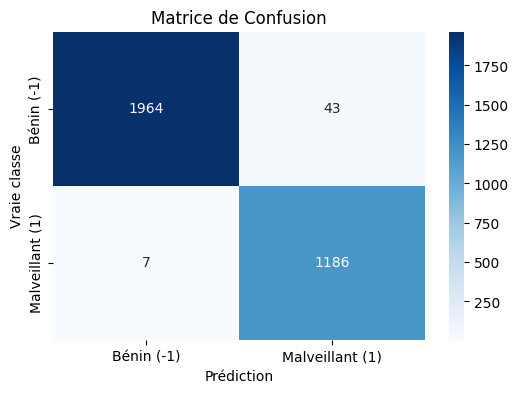

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time

# 1. Entraînement Régression Logistique
print("Entraînement de la Régression Logistique...")
start_time = time.time()

model_lr = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

model_lr.fit(X_train_scaled, y_train)

# 2. Prédictions
y_pred = model_lr.predict(X_test_scaled)

# 3. Évaluation
print("\nTemps d'entraînement : {:.2f} secondes".format(time.time() - start_time))
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

# 4. Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bénin (-1)', 'Malveillant (1)'],
            yticklabels=['Bénin (-1)', 'Malveillant (1)'])
plt.title('Matrice de Confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Prédiction')
plt.show()

Performance des URLs Bénignes (-1.0)
Précision : 1.00 (100%)
Lorsque le modèle prédit qu'une URL est bénigne, il est totalement fiable, avec un taux de précision de 100%.
Rappel : 0.98 (98%)
Le modèle réussit à identifier 98% des URLs bénignes, montrant ainsi une très bonne capacité de détection.
F1-score : 0.99 (99%)
L'équilibre entre précision et rappel est remarquable, avec un F1-score de 99%, indiquant une performance globale excellente.
Performance des URLs Malveillantes (1.0)
Précision : 0.97 (97%)
Dans le cas des prédictions malveillantes, 97% des classifications sont correctes, ce qui témoigne d'une grande fiabilité.
Rappel : 0.99 (99%)
Le modèle est capable de détecter 99% des URLs malveillantes, ce qui est très impressionnant.
F1-score : 0.98 (98%)
Avec un F1-score de 98%, le modèle maintient un équilibre solide entre précision et rappel.
Performance Globale
Exactitude : 0.98 (98%)
En termes d'exactitude, le modèle est correct dans 98% des cas, ce qui est une performance élevée.
Scores macro et pondérés : 0.98
Les scores macro et pondérés sont similaires, indiquant une performance équilibrée entre les deux classes, bénigne et malveillante.

Entraînement du Random Forest...

Temps d'entraînement : 24.80 secondes

Rapport de Classification :
              precision    recall  f1-score   support

        -1.0       0.99      0.98      0.99      2007
         1.0       0.97      0.98      0.98      1193

    accuracy                           0.98      3200
   macro avg       0.98      0.98      0.98      3200
weighted avg       0.98      0.98      0.98      3200



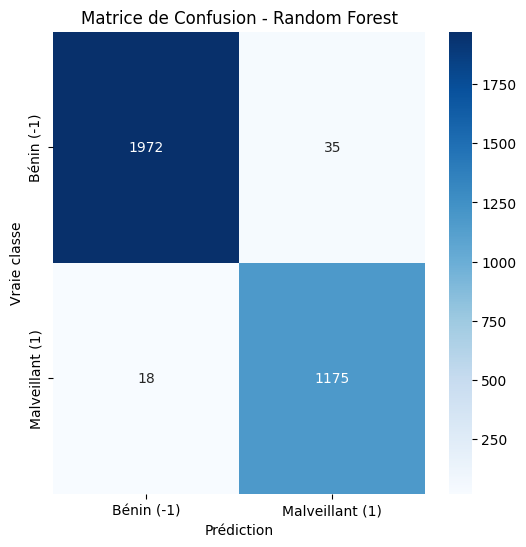


Top 10 features les plus importantes :
Feature 2: 0.0130
Feature 17: 0.0146
Feature 1: 0.0173
Feature 172: 0.0177
Feature 27036: 0.0219
Feature 11: 0.0249
Feature 42: 0.0289
Feature 22: 0.0450
Feature 140: 0.0626
Feature 3: 0.0880


In [29]:
from sklearn.ensemble import RandomForestClassifier
import time

# 1. Entraînement Random Forest
print("Entraînement du Random Forest...")
start_time = time.time()

model_rf = RandomForestClassifier(
   n_estimators=100,  # nombre d'arbres
   random_state=42,
   n_jobs=-1  # utilise tous les cœurs disponibles
)

model_rf.fit(X_train_scaled, y_train)

# 2. Prédictions
y_pred_rf = model_rf.predict(X_test_scaled)

# 3. Évaluation
print("\nTemps d'entraînement : {:.2f} secondes".format(time.time() - start_time))
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_rf))

# 4. Visualisation de la matrice de confusion
plt.figure(figsize=(6, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Bénin (-1)', 'Malveillant (1)'],
           yticklabels=['Bénin (-1)', 'Malveillant (1)'])
plt.title('Matrice de Confusion - Random Forest')
plt.ylabel('Vraie classe')
plt.xlabel('Prédiction')
plt.show()

# 5. Optionnel : Importance des features
feature_importance = model_rf.feature_importances_
top_features = np.argsort(feature_importance)[-10:]  # Top 10 features
print("\nTop 10 features les plus importantes :")
for idx in top_features:
   print(f"Feature {idx}: {feature_importance[idx]:.4f}")

Entraînement de XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:11:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Temps d'entraînement : 7.46 secondes

Rapport de Classification :
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99      2007
         1.0       0.98      0.99      0.99      1193

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200



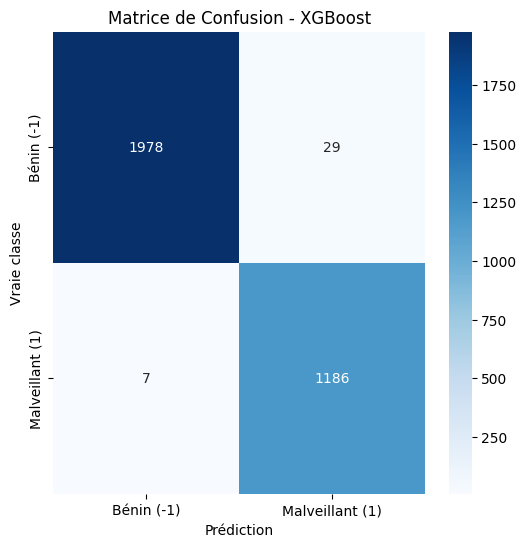


Top 10 features les plus importantes :
Feature 548: 0.0068
Feature 27042: 0.0075
Feature 1403: 0.0082
Feature 44: 0.0090
Feature 1627: 0.0107
Feature 172: 0.0121
Feature 42: 0.0124
Feature 1340: 0.0326
Feature 140: 0.0429
Feature 22: 0.6502


In [30]:
from xgboost import XGBClassifier
import numpy as np

# Transformer les labels de [-1,1] à [0,1]
y_train_xgb = (y_train == 1).astype(int)  # Convertit -1 en 0 et garde 1 en 1
y_test_xgb = (y_test == 1).astype(int)

# 1. Entraînement XGBoost
print("Entraînement de XGBoost...")
start_time = time.time()

model_xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model_xgb.fit(X_train_scaled, y_train_xgb)

# 2. Prédictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

# 3. Évaluation
print("\nTemps d'entraînement : {:.2f} secondes".format(time.time() - start_time))
print("\nRapport de Classification :")
# Reconvertir les prédictions en -1 et 1 pour la cohérence
y_pred_original = np.where(y_pred_xgb == 0, -1, 1)
print(classification_report(y_test, y_pred_original))

# 4. Visualisation de la matrice de confusion
plt.figure(figsize=(6, 6))
cm_xgb = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bénin (-1)', 'Malveillant (1)'],
            yticklabels=['Bénin (-1)', 'Malveillant (1)'])
plt.title('Matrice de Confusion - XGBoost')
plt.ylabel('Vraie classe')
plt.xlabel('Prédiction')
plt.show()

# 5. Importance des features
feature_importance = model_xgb.feature_importances_
top_features = np.argsort(feature_importance)[-10:]
print("\nTop 10 features les plus importantes :")
for idx in top_features:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")